# 图像特效-锐化

In [1]:
from scipy import signal
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [2]:
src = cv2.imread('../datas/beach.jpg')
gray = cv2.imread('../datas/beac.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [9]:
def sharpen(src):
    kernel =np.array([[0, -1, 0],
                [-1, 5, -1],
                [0, -1, 0]]).astype(dtype=np.float32)
    srcf = src.astype(np.float32)
    dst = np.zeros_like(srcf)
    if len(src.shape) > 2:
        dst[:,:,0] = signal.convolve2d(srcf[:,:,0],kernel, boundary='symm', mode='same')
        dst[:,:,1] = signal.convolve2d(srcf[:,:,1],kernel, boundary='symm', mode='same')
        dst[:,:,2] = signal.convolve2d(srcf[:,:,2],kernel, boundary='symm', mode='same')
    else:
        dst = signal.convolve2d(srcf,kernel, boundary='symm', mode='same')
    dst = np.clip(dst,0,255)
    return dst.astype(np.uint8)

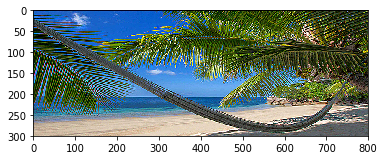

In [10]:
dst = sharpen(rgb)
plt.imshow(dst)